### Creating Mean and Standard Deviation Tables

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('fire.csv')
print(df.keys())

Index(['[run number]', 'start-fire', 'slow-fire-spread', 'people-speed',
       'ticks', 'deaths', 'exited'],
      dtype='object')


In [10]:
fields = ['start-fire','slow-fire-spread', 'people-speed' , 'deaths', 'exited', 'ticks']
df = pd.read_csv('fire.csv', skipinitialspace=False, usecols=fields)

In [11]:
df

,start-fire,slow-fire-spread,people-speed,ticks,deaths,exited
0,0,1,0.1,172,97,123
1,0,1,0.1,172,86,134
2,0,1,0.1,172,81,139
3,0,1,0.1,172,90,130
4,0,1,0.1,172,89,131
...,...,...,...,...,...,...
795,30,4,0.5,51,0,220
796,30,4,0.5,50,0,220
797,30,4,0.5,51,0,220
798,30,4,0.5,51,0,220


In [16]:
df_mean = df.groupby(np.arange(len(df))//10).mean()
df_std = df.groupby(np.arange(len(df))//10).std()

In [17]:
df_mean

,start-fire,slow-fire-spread,people-speed,ticks,deaths,exited
0,0.0,1.0,0.1,172.6,86.2,133.8
1,0.0,1.0,0.2,91.8,56.9,163.1
2,0.0,1.0,0.3,77.0,29.5,190.5
3,0.0,1.0,0.4,58.0,10.4,209.6
4,0.0,1.0,0.5,47.8,0.7,219.3
...,...,...,...,...,...,...
75,30.0,4.0,0.1,228.0,2.4,217.6
76,30.0,4.0,0.2,124.0,0.0,220.0
77,30.0,4.0,0.3,83.0,0.0,220.0
78,30.0,4.0,0.4,63.0,0.0,220.0


In [18]:
df_std

,start-fire,slow-fire-spread,people-speed,ticks,deaths,exited
0,0.0,0.0,0.0,1.897367,6.613118,6.613118
1,0.0,0.0,0.0,2.043961,3.956710,3.956710
2,0.0,0.0,0.0,0.000000,3.979112,3.979112
3,0.0,0.0,0.0,0.000000,2.988868,2.988868
4,0.0,0.0,0.0,0.421637,0.823273,0.823273
...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.000000,1.712698,1.712698
76,0.0,0.0,0.0,0.000000,0.000000,0.000000
77,0.0,0.0,0.0,0.000000,0.000000,0.000000
78,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [20]:
df_mean.to_csv(r'C:\Users\Arifuzzaman Arman\Desktop\fire_mean.csv', index=True, header=True)

In [19]:
df_std.to_csv(r'C:\Users\Arifuzzaman Arman\Desktop\fire_std.csv', index=True, header=True)

In [2]:
df = pd.read_csv('fire_mean_std.csv')
df

,start-fire,slow-fire-spread,people-speed,evacuation time,evacuation time-std,deaths,deaths-std,exited,exited-std
0,0,1,0.1,172.6,1.897367,86.2,6.613118,133.8,6.613118
1,0,1,0.2,91.8,2.043961,56.9,3.956710,163.1,3.956710
2,0,1,0.3,77.0,0.000000,29.5,3.979112,190.5,3.979112
3,0,1,0.4,58.0,0.000000,10.4,2.988868,209.6,2.988868
4,0,1,0.5,47.8,0.421637,0.7,0.823273,219.3,0.823273
...,...,...,...,...,...,...,...,...,...
75,30,4,0.1,228.0,0.000000,2.4,1.712698,217.6,1.712698
76,30,4,0.2,124.0,0.000000,0.0,0.000000,220.0,0.000000
77,30,4,0.3,83.0,0.000000,0.0,0.000000,220.0,0.000000
78,30,4,0.4,63.0,0.000000,0.0,0.000000,220.0,0.000000


### Graphs

#### Fire Initialized at tick 0

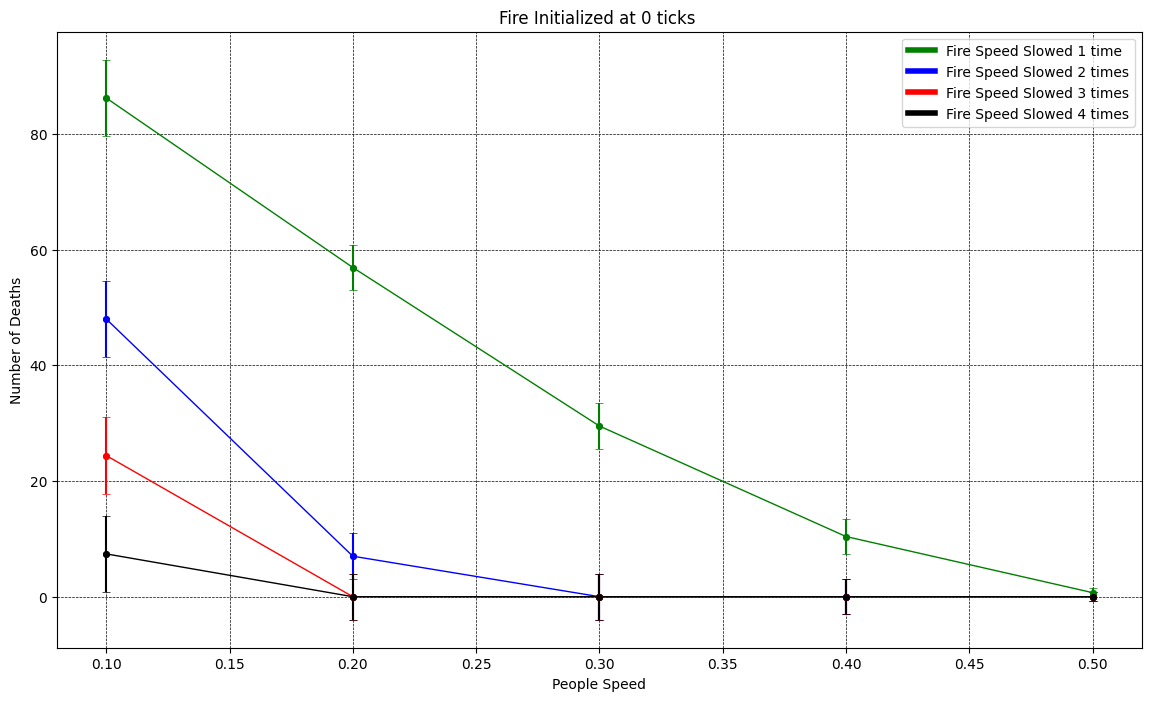

In [3]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14,8))

tick0_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 1)]
tick0_slowed2 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick0_slowed3 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 3)]
tick0_slowed4 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 4)]


(_, caps, _) = ax.errorbar(tick0_slowed1['people-speed'], tick0_slowed1['deaths'], yerr=tick0_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed2['people-speed'], tick0_slowed2['deaths'], yerr=tick0_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed3['people-speed'], tick0_slowed3['deaths'], yerr=tick0_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick0_slowed4['people-speed'], tick0_slowed4['deaths'], yerr=tick0_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'deaths', data=tick0_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick0_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick0_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick0_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Fire Speed Slowed 1 time', 'Fire Speed Slowed 2 times', 'Fire Speed Slowed 3 times','Fire Speed Slowed 4 times'])
plt.title("Fire Initialized at 0 ticks ")
plt.xlabel("People Speed")
plt.ylabel("Number of Deaths")

plt.savefig('Deaths0.png', dpi=300, bbox_inches='tight')
plt.show()

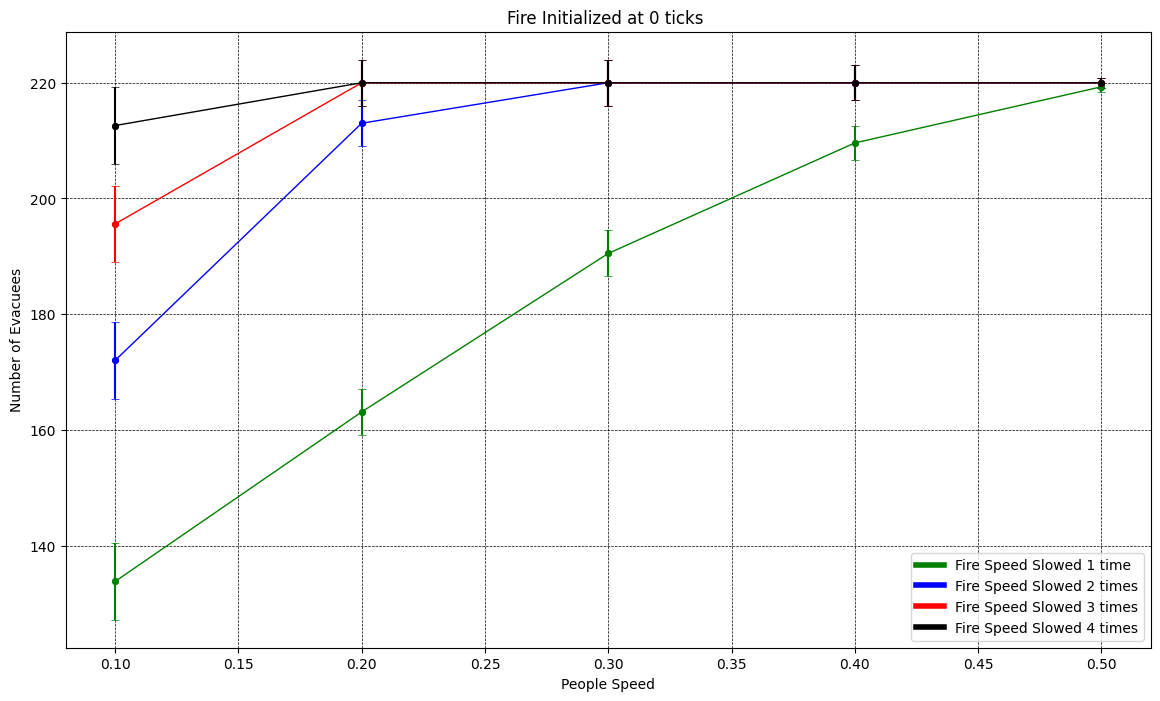

In [8]:
fig, ax = plt.subplots(figsize=(14,8))

tick0_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 1)]
tick0_slowed2 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick0_slowed3 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 3)]
tick0_slowed4 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 4)]


(_, caps, _) = ax.errorbar(tick0_slowed1['people-speed'], tick0_slowed1['exited'], yerr=tick0_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed2['people-speed'], tick0_slowed2['exited'], yerr=tick0_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed3['people-speed'], tick0_slowed3['exited'], yerr=tick0_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick0_slowed4['people-speed'], tick0_slowed4['exited'], yerr=tick0_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'exited', data=tick0_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick0_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick0_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick0_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Fire Speed Slowed 1 time', 'Fire Speed Slowed 2 times', 'Fire Speed Slowed 3 times','Fire Speed Slowed 4 times'])
plt.title("Fire Initialized at 0 ticks ")
plt.xlabel("People Speed")
plt.ylabel("Number of Evacuees")

plt.savefig('Exited0.png', dpi=300, bbox_inches='tight')
plt.show()

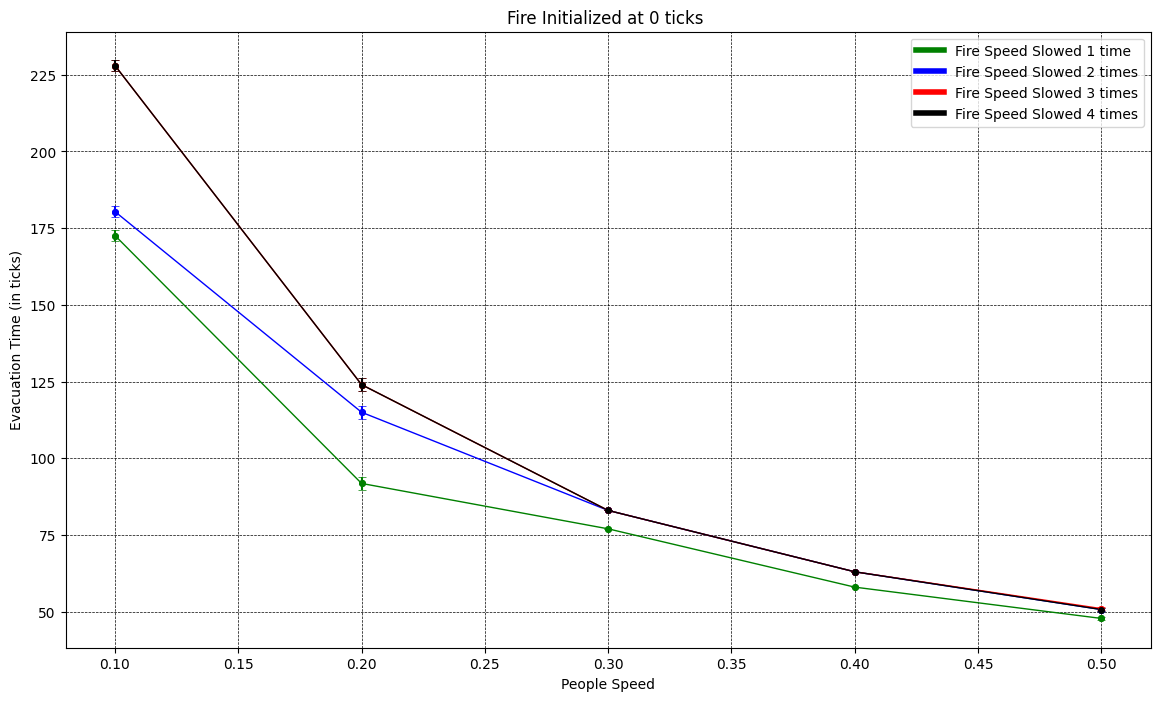

In [9]:
fig, ax = plt.subplots(figsize=(14,8))

tick0_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 1)]
tick0_slowed2 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick0_slowed3 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 3)]
tick0_slowed4 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 4)]


(_, caps, _) = ax.errorbar(tick0_slowed1['people-speed'], tick0_slowed1['evacuation time'], yerr=tick0_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed2['people-speed'], tick0_slowed2['evacuation time'], yerr=tick0_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick0_slowed3['people-speed'], tick0_slowed3['evacuation time'], yerr=tick0_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick0_slowed4['people-speed'], tick0_slowed4['evacuation time'], yerr=tick0_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'evacuation time', data=tick0_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick0_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick0_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick0_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Fire Speed Slowed 1 time', 'Fire Speed Slowed 2 times', 'Fire Speed Slowed 3 times','Fire Speed Slowed 4 times'])
plt.title("Fire Initialized at 0 ticks ")
plt.xlabel("People Speed")
plt.ylabel("Evacuation Time (in ticks)")

plt.savefig('Ticks0.png', dpi=300, bbox_inches='tight')
plt.show()

#### Fire Initialized at ticks 10

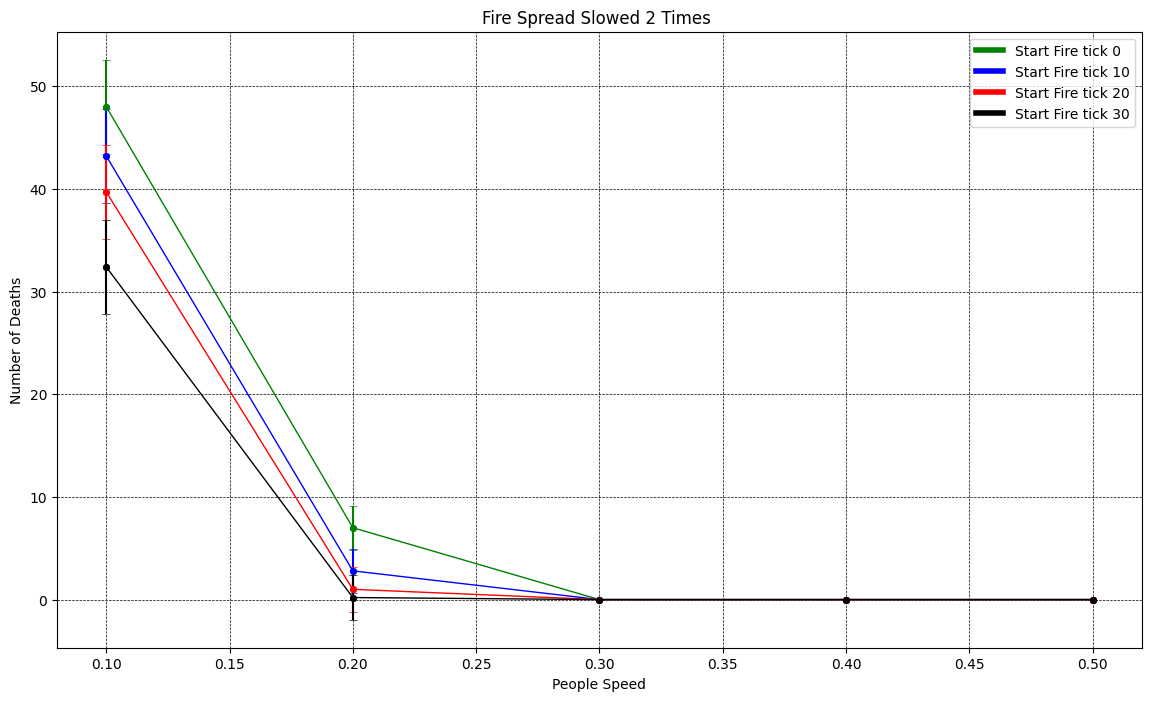

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14,8))

tick10_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick10_slowed2 = df[(df['start-fire'] == 10) & (df['slow-fire-spread'] == 2)]
tick10_slowed3 = df[(df['start-fire'] == 20) & (df['slow-fire-spread'] == 2)]
tick10_slowed4 = df[(df['start-fire'] == 30) & (df['slow-fire-spread'] == 2)]


(_, caps, _) = ax.errorbar(tick10_slowed1['people-speed'], tick10_slowed1['deaths'], yerr=tick10_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed2['people-speed'], tick10_slowed2['deaths'], yerr=tick10_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed3['people-speed'], tick10_slowed3['deaths'], yerr=tick10_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick10_slowed4['people-speed'], tick10_slowed4['deaths'], yerr=tick10_slowed1['deaths-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'deaths', data=tick10_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick10_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick10_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'deaths', data=tick10_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Start Fire tick 0', 'Start Fire tick 10', 'Start Fire tick 20','Start Fire tick 30'])
plt.title("Fire Spread Slowed 2 Times ")
plt.xlabel("People Speed")
plt.ylabel("Number of Deaths")

plt.savefig('Deaths_tick.png', dpi=300, bbox_inches='tight')
plt.show()

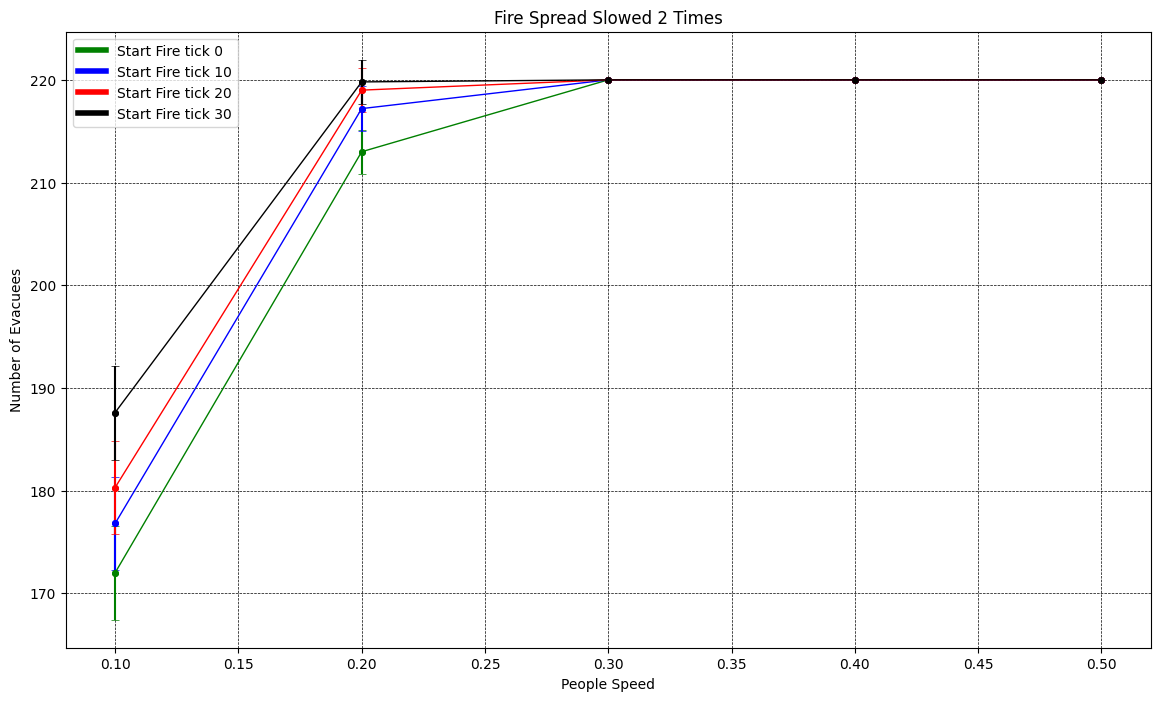

In [12]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14,8))

tick10_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick10_slowed2 = df[(df['start-fire'] == 10) & (df['slow-fire-spread'] == 2)]
tick10_slowed3 = df[(df['start-fire'] == 20) & (df['slow-fire-spread'] == 2)]
tick10_slowed4 = df[(df['start-fire'] == 30) & (df['slow-fire-spread'] == 2)]


(_, caps, _) = ax.errorbar(tick10_slowed1['people-speed'], tick10_slowed1['exited'], yerr=tick10_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed2['people-speed'], tick10_slowed2['exited'], yerr=tick10_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed3['people-speed'], tick10_slowed3['exited'], yerr=tick10_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick10_slowed4['people-speed'], tick10_slowed4['exited'], yerr=tick10_slowed1['exited-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'exited', data=tick10_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick10_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick10_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'exited', data=tick10_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Start Fire tick 0', 'Start Fire tick 10', 'Start Fire tick 20','Start Fire tick 30'])
plt.title("Fire Spread Slowed 2 Times")
plt.xlabel("People Speed")
plt.ylabel("Number of Evacuees")

plt.savefig('Evacuees_tick.png', dpi=300, bbox_inches='tight')
plt.show()

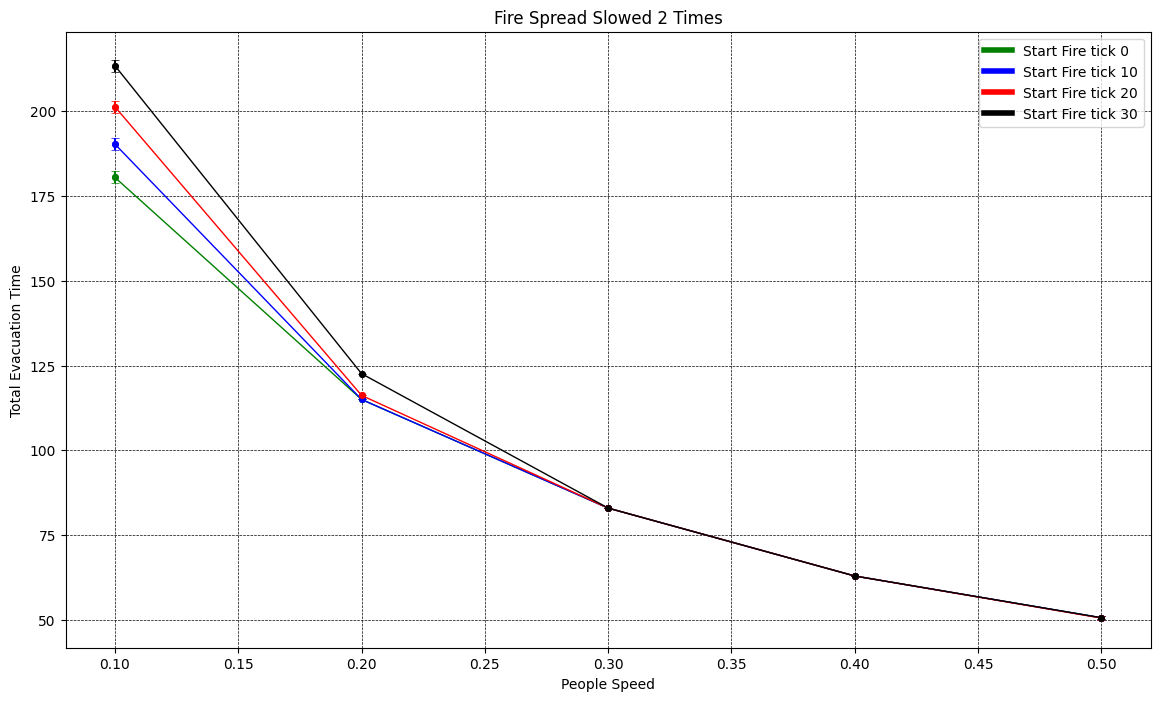

In [15]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14,8))

tick10_slowed1 = df[(df['start-fire'] == 0) & (df['slow-fire-spread'] == 2)]
tick10_slowed2 = df[(df['start-fire'] == 10) & (df['slow-fire-spread'] == 2)]
tick10_slowed3 = df[(df['start-fire'] == 20) & (df['slow-fire-spread'] == 2)]
tick10_slowed4 = df[(df['start-fire'] == 30) & (df['slow-fire-spread'] == 2)]


(_, caps, _) = ax.errorbar(tick10_slowed1['people-speed'], tick10_slowed1['evacuation time'], yerr=tick10_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='green', markeredgecolor='green',markerfacecolor='green')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed2['people-speed'], tick10_slowed2['evacuation time'], yerr=tick10_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='blue', markeredgecolor='blue',markerfacecolor='blue')
for cap in caps:
    cap.set_markeredgewidth(0.5)

(_, caps, _) = ax.errorbar(tick10_slowed3['people-speed'], tick10_slowed3['evacuation time'], yerr=tick10_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='red', markeredgecolor='red',markerfacecolor='red')
for cap in caps:
    cap.set_markeredgewidth(0.5)
     
(_, caps, _) = ax.errorbar(tick10_slowed4['people-speed'], tick10_slowed4['evacuation time'], yerr=tick10_slowed1['evacuation time-std'],
            fmt='o', markersize=4, capsize=3,ecolor='black', markeredgecolor='black',markerfacecolor='black')
for cap in caps:
    cap.set_markeredgewidth(0.5)
    

custom_lines = [Line2D([0], [0], color='green', lw=4),Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),Line2D([0], [0], color='black', lw=4)]

ax.plot( 'people-speed', 'evacuation time', data=tick10_slowed1, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick10_slowed2, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick10_slowed3, marker='o', color='red',  markersize=4, linewidth=1,linestyle='-')
ax.plot( 'people-speed', 'evacuation time', data=tick10_slowed4, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.legend(custom_lines,['Start Fire tick 0', 'Start Fire tick 10', 'Start Fire tick 20','Start Fire tick 30'])
plt.title("Fire Spread Slowed 2 Times")
plt.xlabel("People Speed")
plt.ylabel("Total Evacuation Time")

plt.savefig('Evacuation Time.png', dpi=300, bbox_inches='tight')
plt.show()